
# Reformating Data from API data resource

## Abstract

For this assignment, we would be using the data from sneaker Api. Since we don't need huge amount of data for this assignment. We would re-collect the data from Api to form the database and normolized the database into Third Norm Form. Then we would answer the question and drew the UML model graph, conceptual model graph and physcial model graph.

## 1 Data collection

### 1.1 import libraries

In [2]:
import requests
import pandas as pd
import json
import os
import time
from selenium import webdriver

### 1.2 Get data from Api

In [3]:
rawSneakerJsonData = []
BestSneakers = []
getBestSneakerRequest = 'https://api.thesneakerdatabase.com/v1/sneakers?limit=50' + '&page=' 
print(getBestSneakerRequest)

https://api.thesneakerdatabase.com/v1/sneakers?limit=50&page=


In [4]:
SneakerData = requests.get(getBestSneakerRequest)
rawSneakerJsonData.append(SneakerData.json())
BestSneakers += SneakerData.json()['results']


In [5]:
SneakerData.json()

{'count': 25750,
 'results': [{'id': '87e9ea14-251f-42cb-b5a0-a190e8f15098',
   'brand': 'Vans',
   'colorway': 'Multi-Color',
   'gender': 'men',
   'media': {'imageUrl': 'https://stockx.imgix.net/Vans-Comfycush-Slip-On-Half-Big-Checker.png?fit=fill&bg=FFFFFF&w=700&h=500&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1578035967',
    'smallImageUrl': 'https://stockx.imgix.net/Vans-Comfycush-Slip-On-Half-Big-Checker.png?fit=fill&bg=FFFFFF&w=300&h=214&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1578035967',
    'thumbUrl': 'https://stockx.imgix.net/Vans-Comfycush-Slip-On-Half-Big-Checker.png?fit=fill&bg=FFFFFF&w=140&h=100&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1578035967'},
   'releaseDate': '2020-12-31 23:59:59',
   'retailPrice': 65,
   'styleId': None,
   'title': 'Vans Comfycush Slip-On Half Big Checker',
   'year': 2020},
  {'id': '9595bf3d-d799-4084-ae3a-49e08360b2d5',
   'brand': 'Jordan',
   'colorway': 'Dark Mocha/Infrared 23-Black',
   'gender':

In [6]:
rawSneakerJsonData[0]


{'count': 25750,
 'results': [{'id': '87e9ea14-251f-42cb-b5a0-a190e8f15098',
   'brand': 'Vans',
   'colorway': 'Multi-Color',
   'gender': 'men',
   'media': {'imageUrl': 'https://stockx.imgix.net/Vans-Comfycush-Slip-On-Half-Big-Checker.png?fit=fill&bg=FFFFFF&w=700&h=500&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1578035967',
    'smallImageUrl': 'https://stockx.imgix.net/Vans-Comfycush-Slip-On-Half-Big-Checker.png?fit=fill&bg=FFFFFF&w=300&h=214&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1578035967',
    'thumbUrl': 'https://stockx.imgix.net/Vans-Comfycush-Slip-On-Half-Big-Checker.png?fit=fill&bg=FFFFFF&w=140&h=100&auto=format,compress&trim=color&q=90&dpr=2&updated_at=1578035967'},
   'releaseDate': '2020-12-31 23:59:59',
   'retailPrice': 65,
   'styleId': None,
   'title': 'Vans Comfycush Slip-On Half Big Checker',
   'year': 2020},
  {'id': '9595bf3d-d799-4084-ae3a-49e08360b2d5',
   'brand': 'Jordan',
   'colorway': 'Dark Mocha/Infrared 23-Black',
   'gender':

In [7]:
selectedColumns = ['id', 'brand', 'colorway', 'gender', 'releaseDate','retailPrice','styleId','title','year' ]
sneakerDataFrame = pd.DataFrame(BestSneakers, columns = selectedColumns)
sneakerDataFrame.describe()
print(sneakerDataFrame)

                                      id        brand  \
0   87e9ea14-251f-42cb-b5a0-a190e8f15098         Vans   
1   9595bf3d-d799-4084-ae3a-49e08360b2d5       Jordan   
2   ee5c25ca-ac30-4de1-9d3f-65168b103361       Jordan   
3   04b5280a-b04d-43eb-9ced-dc868a21779e       Jordan   
4   52454854-3a4d-4db7-8c38-cca3705b3600       Jordan   
5   c8535733-1136-49c1-9991-2fd2e41ac925       Jordan   
6   e9b8aa8b-1a10-42a0-bec0-7bc2fd9cfb5f       Jordan   
7   babbc835-5c05-4583-9408-655091277a13       Jordan   
8   ca736d9e-c96e-40d6-9913-0f8e516680e6       Jordan   
9   19486669-5518-4539-a2f8-881b8c56c44b         Nike   
10  038a9659-c88a-4cce-92cf-687e29856e2b       Jordan   
11  f7a447c7-27f5-4b92-acb2-bd60580b8267       Jordan   
12  fc5c20cd-4acc-4d60-8154-40c9ca2cc477       Jordan   
13  a1cb8abf-13fd-4573-9ee0-f4e20435942c       Jordan   
14  033454e1-af0e-4a30-9af1-5b69d2d8649b       Jordan   
15  7bf95a86-42af-4e00-b3ba-b9978ed0c7cf       Jordan   
16  7deca14b-1bef-4c11-9005-ddb

In [8]:
sneakerDataFrame.isnull().any()

id             False
brand          False
colorway       False
gender         False
releaseDate    False
retailPrice     True
styleId         True
title          False
year           False
dtype: bool

In [9]:
sneakerDataFrame["retailPrice"].fillna(150,inplace = True)

In [13]:
sneakerDataFrame.isnull().any()

id             False
brand          False
colorway       False
gender         False
releaseDate    False
retailPrice    False
styleId        False
title          False
year           False
dtype: bool

In [12]:
sneakerDataFrame.dropna(subset=['styleId'], inplace=True)

In [14]:
sneakerDataFrame.isnull().any()

id             False
brand          False
colorway       False
gender         False
releaseDate    False
retailPrice    False
styleId        False
title          False
year           False
dtype: bool

In [15]:
print(sneakerDataFrame)

                                      id   brand  \
1   9595bf3d-d799-4084-ae3a-49e08360b2d5  Jordan   
2   ee5c25ca-ac30-4de1-9d3f-65168b103361  Jordan   
5   c8535733-1136-49c1-9991-2fd2e41ac925  Jordan   
7   babbc835-5c05-4583-9408-655091277a13  Jordan   
8   ca736d9e-c96e-40d6-9913-0f8e516680e6  Jordan   
10  038a9659-c88a-4cce-92cf-687e29856e2b  Jordan   
13  a1cb8abf-13fd-4573-9ee0-f4e20435942c  Jordan   
15  7bf95a86-42af-4e00-b3ba-b9978ed0c7cf  Jordan   
19  32c8529c-2b39-44e3-8b6d-7b99ec546380  Jordan   
24  d7add4ba-84dd-4639-977f-661ce1959552  Jordan   
26  c0591fd8-e359-4028-88dd-94b20165ab5f  Jordan   
27  f78e239f-7600-463d-8d1a-a2f7b8c68c0f  Jordan   
29  e227866b-ddab-4ea9-b54e-11e07161e25c  Jordan   
30  ba80c366-c551-449e-9da4-75d7ce26c49b    Nike   
32  652d8004-d441-466d-a725-21d48600f624  Jordan   
33  edfa8bad-5097-4da9-a4c8-b6e3c2dbc1b0  Jordan   
34  54a24b2d-4353-4881-9a03-75126bdb9fa6  Jordan   
35  ae674014-8dbf-4851-86bd-9cd91ada6934  Jordan   
36  4ed9417c

## 2 Reformatting the database

###  2.1 Color_Gender table

In [19]:
Color_Gender = sneakerDataFrame.loc[:,['id','colorway','gender']]
Color_Gender

,id,colorway,gender
1,9595bf3d-d799-4084-ae3a-49e08360b2d5,Dark Mocha/Infrared 23-Black,men
2,ee5c25ca-ac30-4de1-9d3f-65168b103361,Apple Green/Black-Yellow Strike-Black,men
5,c8535733-1136-49c1-9991-2fd2e41ac925,Stone Blue/Legend Blue-Obsidian,men
7,babbc835-5c05-4583-9408-655091277a13,White/Pine Green-Neutral Grey-Muslin,men
8,ca736d9e-c96e-40d6-9913-0f8e516680e6,Black/Fire Red-Cement Grey-White,men
10,038a9659-c88a-4cce-92cf-687e29856e2b,Black/Fire Red-Grape Ice-New Emerald,men
13,a1cb8abf-13fd-4573-9ee0-f4e20435942c,Black/White-Game Royal-Black,men
15,7bf95a86-42af-4e00-b3ba-b9978ed0c7cf,Neutral Grey/White-True Red-Black,men
19,32c8529c-2b39-44e3-8b6d-7b99ec546380,Court Purple/White-Black,men
24,d7add4ba-84dd-4639-977f-661ce1959552,White/Black-Metallic Silver-Fire Red,men


### 2.2 Release_time table

In [21]:
Release_time = sneakerDataFrame.loc[:,['id','releaseDate','year']]
Release_time

,id,releaseDate,year
1,9595bf3d-d799-4084-ae3a-49e08360b2d5,2020-09-26 23:59:59,2020
2,ee5c25ca-ac30-4de1-9d3f-65168b103361,2020-09-12 23:59:59,2020
5,c8535733-1136-49c1-9991-2fd2e41ac925,2020-08-08 23:59:59,2020
7,babbc835-5c05-4583-9408-655091277a13,2020-08-05 23:59:59,2020
8,ca736d9e-c96e-40d6-9913-0f8e516680e6,2020-07-09 23:59:59,2020
10,038a9659-c88a-4cce-92cf-687e29856e2b,2020-05-16 23:59:59,2020
13,a1cb8abf-13fd-4573-9ee0-f4e20435942c,2020-05-09 23:59:59,2020
15,7bf95a86-42af-4e00-b3ba-b9978ed0c7cf,2020-04-08 23:59:59,2020
19,32c8529c-2b39-44e3-8b6d-7b99ec546380,2020-04-04 23:59:59,2020
24,d7add4ba-84dd-4639-977f-661ce1959552,2020-03-28 23:59:59,2020


### 2.3 Brand_Retailprice table

In this table, we meanly display the 

In [20]:
Brand_Retailprice = sneakerDataFrame.loc[:,['id','title','brand','retailPrice']]
Brand_Retailprice

,id,title,brand,retailPrice
1,9595bf3d-d799-4084-ae3a-49e08360b2d5,Jordan 10 Retro Dark Mocha,Jordan,190.0
2,ee5c25ca-ac30-4de1-9d3f-65168b103361,Jordan 5 Retro SE Oregon,Jordan,225.0
5,c8535733-1136-49c1-9991-2fd2e41ac925,Jordan 12 Retro Stone Blue,Jordan,190.0
7,babbc835-5c05-4583-9408-655091277a13,Jordan 4 Retro Pine Green,Jordan,225.0
8,ca736d9e-c96e-40d6-9913-0f8e516680e6,Jordan 11 Retro Low IE Black Cement,Jordan,170.0
10,038a9659-c88a-4cce-92cf-687e29856e2b,Jordan 5 Retro Top 3,Jordan,200.0
13,a1cb8abf-13fd-4573-9ee0-f4e20435942c,Jordan 1 Retro High Black Game Royal,Jordan,170.0
15,7bf95a86-42af-4e00-b3ba-b9978ed0c7cf,Jordan 6 Retro Hare,Jordan,190.0
19,32c8529c-2b39-44e3-8b6d-7b99ec546380,Jordan 1 Retro High Court Purple White,Jordan,160.0
24,d7add4ba-84dd-4639-977f-661ce1959552,Jordan 5 Retro Fire Red Silver Tongue (2020),Jordan,200.0


## 3 Normolization Analysis

For our sneaker database, we generally have three database: 1.Color_Gender table, 2.Release_time table, 3.Brand_Retailprice table.

Since the id of the sneaker data is the primary key of each table and is already unique. There's no multi-values in each column, in other words,the value in each column is atomic. Also, no two column store same type of values. Thus, the above database is already in First-norm-form. 

However, the release year can be calculated according to the release date, we could also say that the release year is dependent on the release-data, and the release-date is dependent on the id of each item. So the database is neither in Second-Norm form nor Third norm. 

Similarly, the title attribute in the Brand_Retail price is dependent on the id, and the brand and retailPrice attribute is dependent on the title. Thus, the Brand_Retail price also has transitive dependency. 

Thus we would seperate the Release_time table and Brand_RetailPrice table to satisfy the database into second_norm form and third_norm form.

### 3.1 seperating Release_time table to Release_Date table and Release_Year table

#### 3.1.1 forming Release_Date table

In [23]:
Release_Date = Release_time.loc[:,['id','releaseDate']]
Release_Date

,id,releaseDate
1,9595bf3d-d799-4084-ae3a-49e08360b2d5,2020-09-26 23:59:59
2,ee5c25ca-ac30-4de1-9d3f-65168b103361,2020-09-12 23:59:59
5,c8535733-1136-49c1-9991-2fd2e41ac925,2020-08-08 23:59:59
7,babbc835-5c05-4583-9408-655091277a13,2020-08-05 23:59:59
8,ca736d9e-c96e-40d6-9913-0f8e516680e6,2020-07-09 23:59:59
10,038a9659-c88a-4cce-92cf-687e29856e2b,2020-05-16 23:59:59
13,a1cb8abf-13fd-4573-9ee0-f4e20435942c,2020-05-09 23:59:59
15,7bf95a86-42af-4e00-b3ba-b9978ed0c7cf,2020-04-08 23:59:59
19,32c8529c-2b39-44e3-8b6d-7b99ec546380,2020-04-04 23:59:59
24,d7add4ba-84dd-4639-977f-661ce1959552,2020-03-28 23:59:59


#### 3.1.2 forming Release_Year table

In [24]:
Release_Year = Release_time.loc[:,['releaseDate','year']]
Release_Year

,releaseDate,year
1,2020-09-26 23:59:59,2020
2,2020-09-12 23:59:59,2020
5,2020-08-08 23:59:59,2020
7,2020-08-05 23:59:59,2020
8,2020-07-09 23:59:59,2020
10,2020-05-16 23:59:59,2020
13,2020-05-09 23:59:59,2020
15,2020-04-08 23:59:59,2020
19,2020-04-04 23:59:59,2020
24,2020-03-28 23:59:59,2020


#### Drop duplicates of Release Year database

In [25]:
Release_Year.drop_duplicates(subset=None, keep='first', inplace=False)

,releaseDate,year
1,2020-09-26 23:59:59,2020
2,2020-09-12 23:59:59,2020
5,2020-08-08 23:59:59,2020
7,2020-08-05 23:59:59,2020
8,2020-07-09 23:59:59,2020
10,2020-05-16 23:59:59,2020
13,2020-05-09 23:59:59,2020
15,2020-04-08 23:59:59,2020
19,2020-04-04 23:59:59,2020
24,2020-03-28 23:59:59,2020


### 3.2 seperating Brand_Retail price table into Sneaker_Title table and Sneaker_Retailprice table

In [26]:
Sneaker_Title = Brand_Retailprice.loc[:,['id','title']]
Sneaker_Title

,id,title
1,9595bf3d-d799-4084-ae3a-49e08360b2d5,Jordan 10 Retro Dark Mocha
2,ee5c25ca-ac30-4de1-9d3f-65168b103361,Jordan 5 Retro SE Oregon
5,c8535733-1136-49c1-9991-2fd2e41ac925,Jordan 12 Retro Stone Blue
7,babbc835-5c05-4583-9408-655091277a13,Jordan 4 Retro Pine Green
8,ca736d9e-c96e-40d6-9913-0f8e516680e6,Jordan 11 Retro Low IE Black Cement
10,038a9659-c88a-4cce-92cf-687e29856e2b,Jordan 5 Retro Top 3
13,a1cb8abf-13fd-4573-9ee0-f4e20435942c,Jordan 1 Retro High Black Game Royal
15,7bf95a86-42af-4e00-b3ba-b9978ed0c7cf,Jordan 6 Retro Hare
19,32c8529c-2b39-44e3-8b6d-7b99ec546380,Jordan 1 Retro High Court Purple White
24,d7add4ba-84dd-4639-977f-661ce1959552,Jordan 5 Retro Fire Red Silver Tongue (2020)


In [27]:
Sneaker_Retailprice = Brand_Retailprice.loc[:,['title','brand','retailPrice']]
Sneaker_Retailprice

,title,brand,retailPrice
1,Jordan 10 Retro Dark Mocha,Jordan,190.0
2,Jordan 5 Retro SE Oregon,Jordan,225.0
5,Jordan 12 Retro Stone Blue,Jordan,190.0
7,Jordan 4 Retro Pine Green,Jordan,225.0
8,Jordan 11 Retro Low IE Black Cement,Jordan,170.0
10,Jordan 5 Retro Top 3,Jordan,200.0
13,Jordan 1 Retro High Black Game Royal,Jordan,170.0
15,Jordan 6 Retro Hare,Jordan,190.0
19,Jordan 1 Retro High Court Purple White,Jordan,160.0
24,Jordan 5 Retro Fire Red Silver Tongue (2020),Jordan,200.0


## 4 Conclusion on database

After the normolization, the sneaker database is now in Third Norm Form. The sneaker database consists of 5 tables, whcih are:
   1.Sneaker_Retailprice table(primary key is title)
   2.Sneaker_Title table(primary key is id, foreign key is title)
   3.Release_Date table(Primary key is id, foreign key is releaseDate)
   4.Release_Year table(Primary key is releaseDate) 
   5.Color_Gender table(Primary key is id)
   

In [28]:
Sneaker_Retailprice

,title,brand,retailPrice
1,Jordan 10 Retro Dark Mocha,Jordan,190.0
2,Jordan 5 Retro SE Oregon,Jordan,225.0
5,Jordan 12 Retro Stone Blue,Jordan,190.0
7,Jordan 4 Retro Pine Green,Jordan,225.0
8,Jordan 11 Retro Low IE Black Cement,Jordan,170.0
10,Jordan 5 Retro Top 3,Jordan,200.0
13,Jordan 1 Retro High Black Game Royal,Jordan,170.0
15,Jordan 6 Retro Hare,Jordan,190.0
19,Jordan 1 Retro High Court Purple White,Jordan,160.0
24,Jordan 5 Retro Fire Red Silver Tongue (2020),Jordan,200.0


In [29]:
Sneaker_Title

,id,title
1,9595bf3d-d799-4084-ae3a-49e08360b2d5,Jordan 10 Retro Dark Mocha
2,ee5c25ca-ac30-4de1-9d3f-65168b103361,Jordan 5 Retro SE Oregon
5,c8535733-1136-49c1-9991-2fd2e41ac925,Jordan 12 Retro Stone Blue
7,babbc835-5c05-4583-9408-655091277a13,Jordan 4 Retro Pine Green
8,ca736d9e-c96e-40d6-9913-0f8e516680e6,Jordan 11 Retro Low IE Black Cement
10,038a9659-c88a-4cce-92cf-687e29856e2b,Jordan 5 Retro Top 3
13,a1cb8abf-13fd-4573-9ee0-f4e20435942c,Jordan 1 Retro High Black Game Royal
15,7bf95a86-42af-4e00-b3ba-b9978ed0c7cf,Jordan 6 Retro Hare
19,32c8529c-2b39-44e3-8b6d-7b99ec546380,Jordan 1 Retro High Court Purple White
24,d7add4ba-84dd-4639-977f-661ce1959552,Jordan 5 Retro Fire Red Silver Tongue (2020)


In [30]:
Release_Date

,id,releaseDate
1,9595bf3d-d799-4084-ae3a-49e08360b2d5,2020-09-26 23:59:59
2,ee5c25ca-ac30-4de1-9d3f-65168b103361,2020-09-12 23:59:59
5,c8535733-1136-49c1-9991-2fd2e41ac925,2020-08-08 23:59:59
7,babbc835-5c05-4583-9408-655091277a13,2020-08-05 23:59:59
8,ca736d9e-c96e-40d6-9913-0f8e516680e6,2020-07-09 23:59:59
10,038a9659-c88a-4cce-92cf-687e29856e2b,2020-05-16 23:59:59
13,a1cb8abf-13fd-4573-9ee0-f4e20435942c,2020-05-09 23:59:59
15,7bf95a86-42af-4e00-b3ba-b9978ed0c7cf,2020-04-08 23:59:59
19,32c8529c-2b39-44e3-8b6d-7b99ec546380,2020-04-04 23:59:59
24,d7add4ba-84dd-4639-977f-661ce1959552,2020-03-28 23:59:59


In [31]:
Release_Year

,releaseDate,year
1,2020-09-26 23:59:59,2020
2,2020-09-12 23:59:59,2020
5,2020-08-08 23:59:59,2020
7,2020-08-05 23:59:59,2020
8,2020-07-09 23:59:59,2020
10,2020-05-16 23:59:59,2020
13,2020-05-09 23:59:59,2020
15,2020-04-08 23:59:59,2020
19,2020-04-04 23:59:59,2020
24,2020-03-28 23:59:59,2020


In [32]:
Color_Gender

,id,colorway,gender
1,9595bf3d-d799-4084-ae3a-49e08360b2d5,Dark Mocha/Infrared 23-Black,men
2,ee5c25ca-ac30-4de1-9d3f-65168b103361,Apple Green/Black-Yellow Strike-Black,men
5,c8535733-1136-49c1-9991-2fd2e41ac925,Stone Blue/Legend Blue-Obsidian,men
7,babbc835-5c05-4583-9408-655091277a13,White/Pine Green-Neutral Grey-Muslin,men
8,ca736d9e-c96e-40d6-9913-0f8e516680e6,Black/Fire Red-Cement Grey-White,men
10,038a9659-c88a-4cce-92cf-687e29856e2b,Black/Fire Red-Grape Ice-New Emerald,men
13,a1cb8abf-13fd-4573-9ee0-f4e20435942c,Black/White-Game Royal-Black,men
15,7bf95a86-42af-4e00-b3ba-b9978ed0c7cf,Neutral Grey/White-True Red-Black,men
19,32c8529c-2b39-44e3-8b6d-7b99ec546380,Court Purple/White-Black,men
24,d7add4ba-84dd-4639-977f-661ce1959552,White/Black-Metallic Silver-Fire Red,men


## 5. Graphs

### 5.1 UML model graph

From the UML model graph below we could see that the Release_Year 'IS A' Release_Date. Release_Year inherited from the Release_Date, and thus is a Release_Date. For a single Sneaker, it has the attributes of Color_Gender, Release_Date and Sneaker_Retailprice. Thus the Sneaker_Title 'Has A' Sneaker_Retailprice, Release_Date and Color_gender.

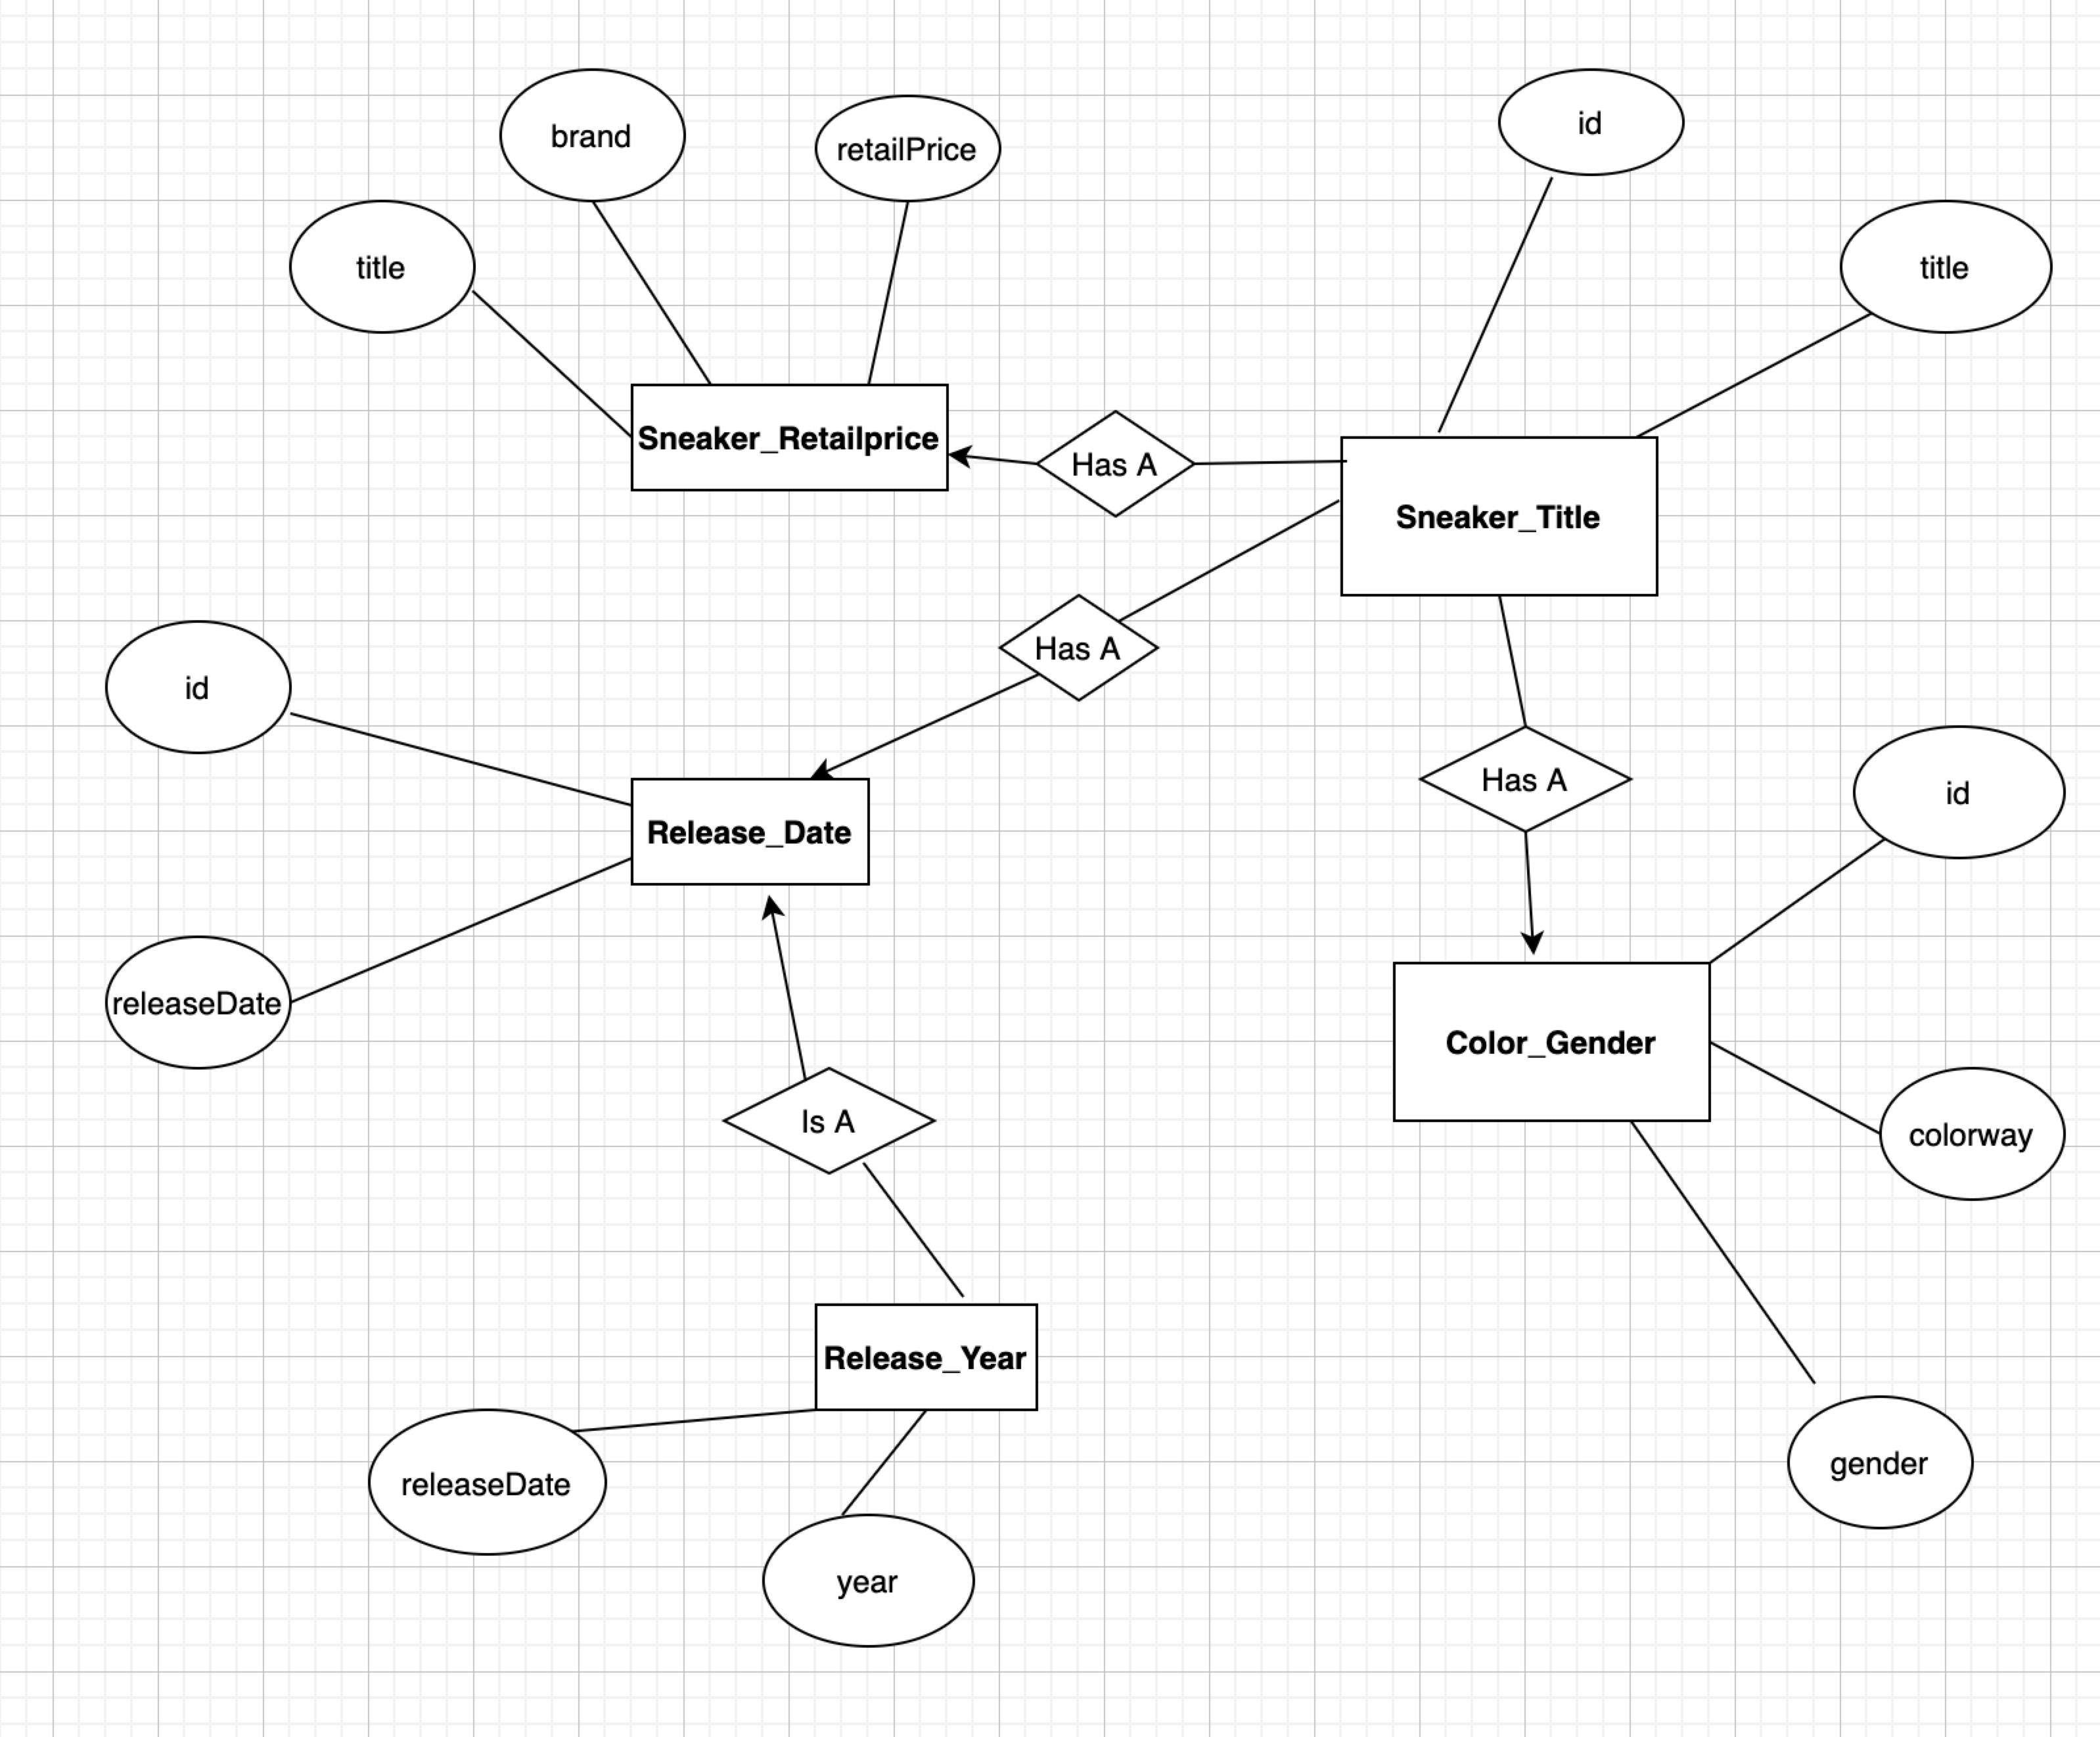

In [1]:
from IPython.display import Image
Image("uml1.jpeg")

### 5.2 Concpetual Model

From the graph below we could see that in the sneaker database, there are 5 tables, namely, Sneaker_Retailprice, Sneaker_Title, Release_Date, Release_Year, Color_Gender. The Release_Date and Sneaker_title has a Many-to-Many relationship. The Color_Gender and Sneaker_Title has a Many-to-Many relationship. The Release_Date table and Release_Year table has a One-to-Many relationship, since in one year there could be many detailed release date.The Sneaker_Retailprice and Sneaker_title is also One-to-Many relationship, since one sneaker could only have one retail price, but multiple sneakers could be sold at one price. 

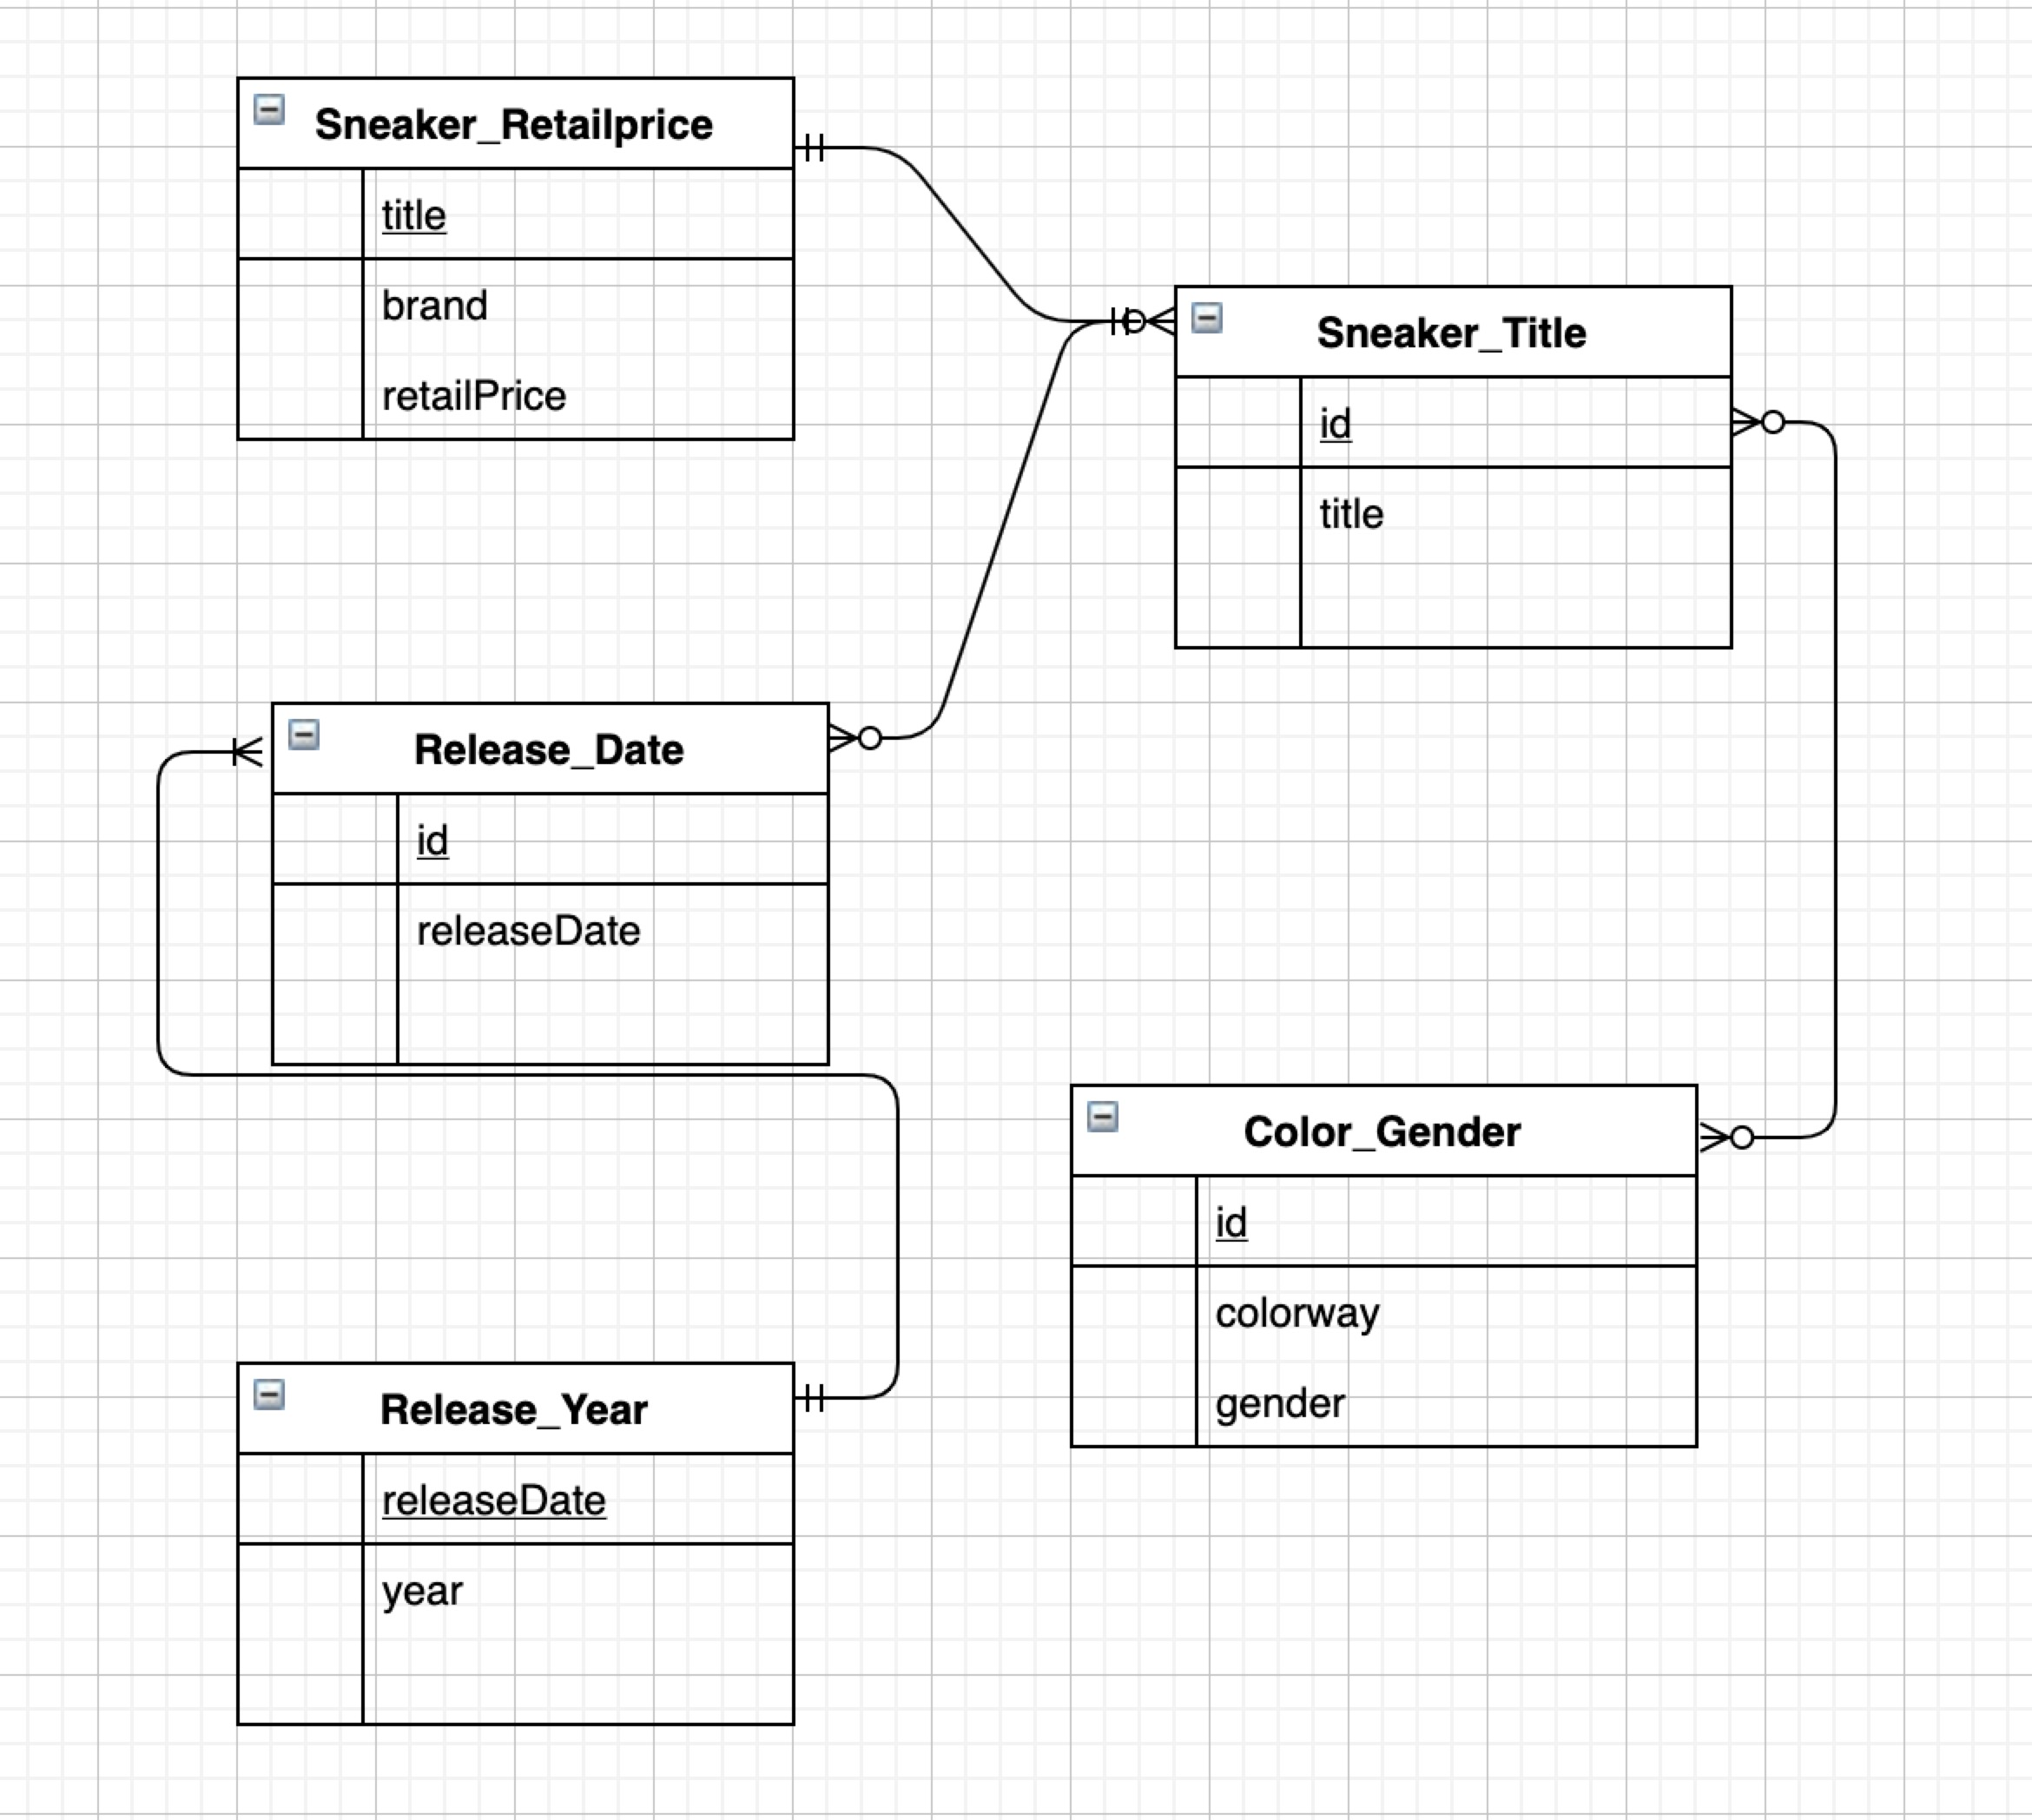

In [5]:
from IPython.display import Image
Image("Conceptual1.jpeg")

### 5.3 Physical Model

In the following Physical model graph, we can see the detailed primary keys, foreign keys, table names, column names and data type of the database. The foreign key of Sneaker_Title title is the primary key of the Sneaker_Retailprice. The foreign key releaseDate is the primary key of table Release_Year. The primary key of table Sneaker_Title, Release_Date and Color_Gender are the same id.

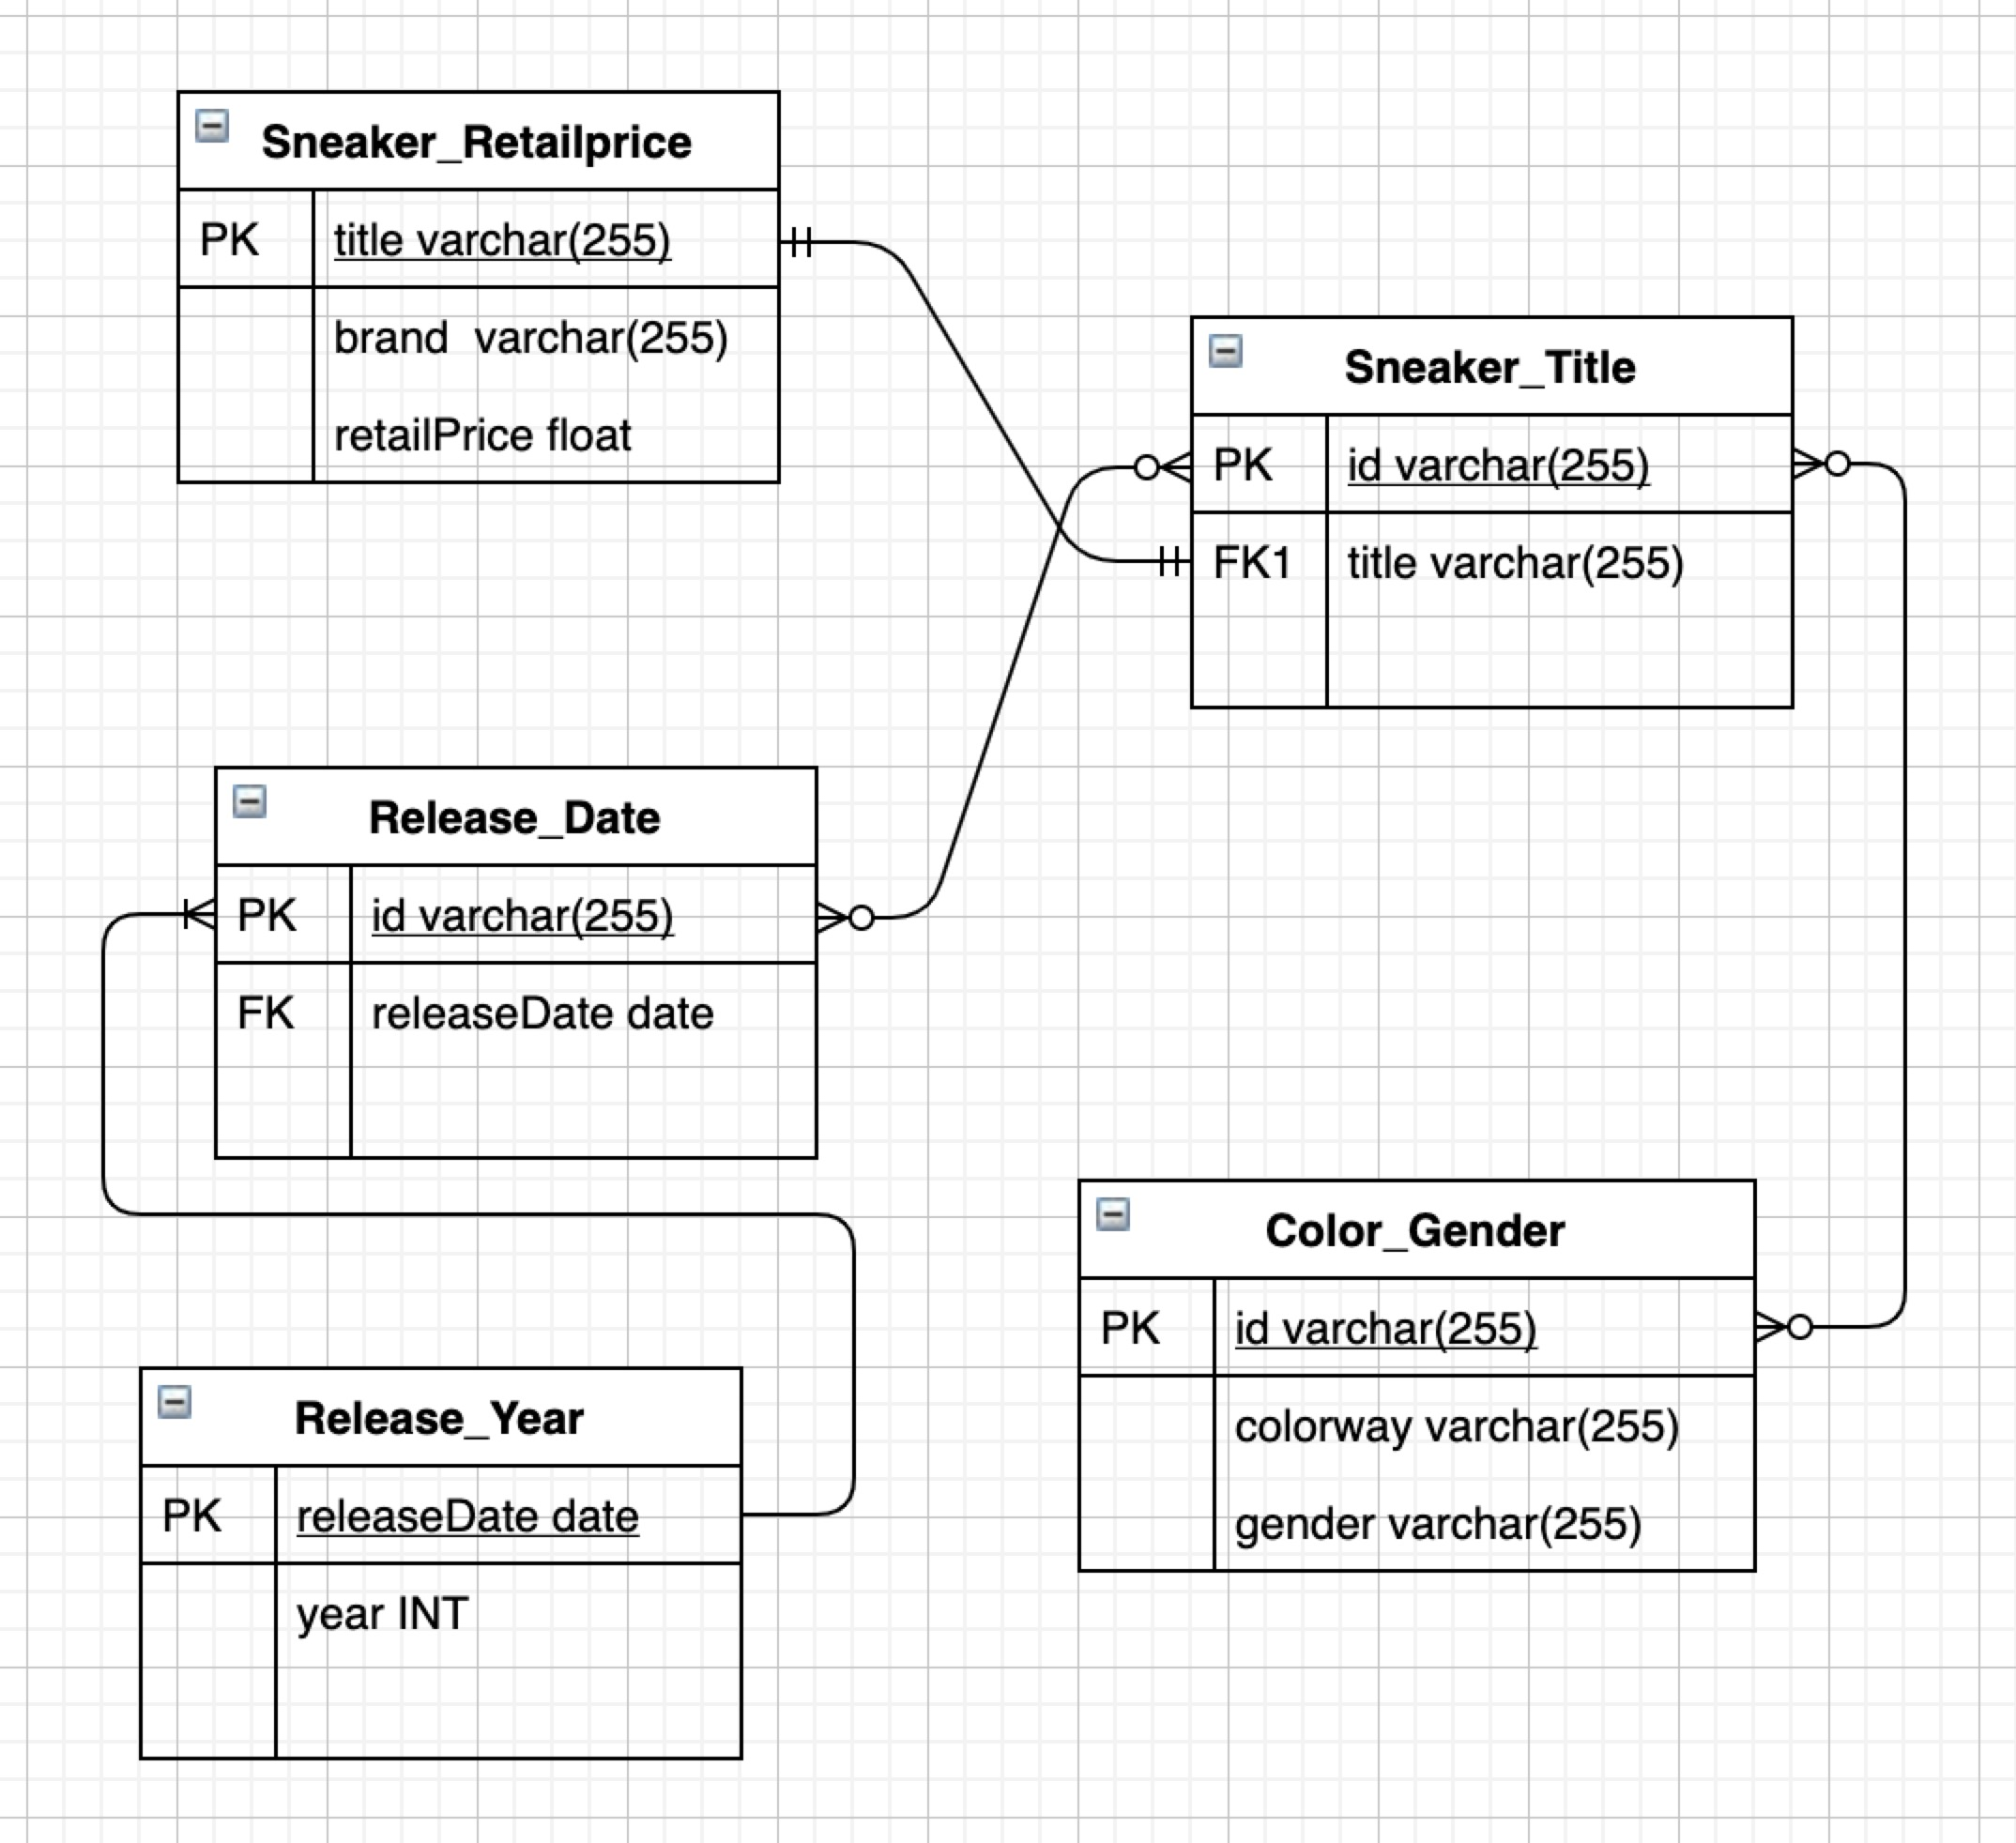

In [4]:
from IPython.display import Image
Image("physical1.jpeg")

## 6 Answering Questions

question 1:What are the ranges, data types and format of all of the attributes in your entities?

Answers:
Entity1:
Sneaker_Title
Attritutes: id varchar(255)
title varchar (255)
        
Entity2: Sneaker_Retailprice
Attritutes: title varchar(255)
brand varchar (255)
retailPrice Float

Entity3: Release_Date
Attritutes: Id varchar(255)
releaseDate date

Entity4: Color_Gender
Attritutes: colorway varchar(255)
gender varchar(255)

Entity5: Release_Year
Attritutes: releaseDate date
year INT


                 
         
         

question2: When should you use an entity versus attribute? (Example: address of a person could be modeled as either)

The original meaning of one entity is a subject,which refers to a table in the database. This entity must be distinguishable from other entities. Entities could be abstract or specific. The attribute is owned by entities and are used to describe each entity. The attribute could be described as a function that maps the entity that it belongs to to the corresponding database.

While we first form a database, we need to establish the relationship between entities. When we dive into the entities, we need to be specific on each attribute, and thus, we need to add value to attributes, datatype and ranges to attributes.

The address of a person could indeed be modeled ethier as an attribute and an entity. If we define the address as an entity, the attribute belongs to it could be city, country, zip code, etc. If the address is defined as a person, the entity it belongs to could be a person. The person entity could have entities like name address, sex, age, etc. 

question3: When should you use an entity or relationship, and placement of attributes? (Example: a manager could be modeled as either)

A manager could be modeled as either. If a manager is modeled as an entity, a manager is a one category in the database, in other word, a table in the database. In this manager entity, attributes could be manageer_id, name, age, sex, phone number,etc. If a manager is modeled as an attribute, it must belong to a certain entity, and manager is one of the attributes of this entity. This time, the entity that manager belongs to could be a department in a company, could be a job. The other attributes in the entity Manager belongs to could be normal staff, CEOs, etc. If a manager is modeled as a relationship, manager should be the connection of two entities. It is responsible for establishing relation between two entities. For example, there could be a managing relationship table describing the managing hierarchy of the company, like certain employees are under the leadership of certain managers.

question4: How did you choose your keys? Which are unique?

In my database, I used id of the sneaker as the primary key for Sneaker_Title, Release_Date and Color_Gender table. Since the Id of each sneaker is the unique identifier of all these three tables, Id could be the primary key of all these three tables. When normalizing the database, we seperated the Sneaker_Retailprice from the Sneaker_Title table, the primary key of the new table is the title of the sneaker, which is also unique. We also separated the Release_Year from the Release_data database. The primary key of the Release_year table is the releaseDate.

question5: Did you model hierarchies using the “ISA” design element? Why or why not

ISA basically represents the inheritance relationship of different entities. In our UML graph model, we used ISA relationship to represent the relationship of Release_Date table and Release_Year table. Basically, Release_Year is another form of Release_Date, just being more general. This represents the inheritance relationship, and thus, is an ISA relationship.

question6. Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs. relationship, binary vs. ternary relationships?

There are indeed alternatives in my database design.When forming the Color_Gender table, we first decided to combine the Color_Gender table into the Sneaker_Title table. But it could be a little reduntant for the sneaker_title database, since the entity of Colorway and gender does not have a direct strong relationship with the Sneaker_Title. Thus, separting the Color_Gender table from the Sneaker_Title database would make more sense. Since the Sneaker_Title database is connected to Color_Gender table, Release_Date table and Sneaker_Retailprice table, it forms a ternary relationship.

question7:Where are you going find real-world data populate your model?

Currently all of my database data are from api https://api.thesneakerdatabase.com/v1/sneakers?limit=50&page=. But for the coming database, we would also use scraped data from http://www.thesneakerdatabase.com/.

Questions you must answer about your physical model: 
1. Are all the tables in 1NF?
2. Are all the tables in 2NF?
3. Are all the tables in 3NF?

Answer:

1: The original data is already in 1NF, since the primary key could uniquely identify a
record, the values in each column of a table are atomic and there are no repeating groups.
2. The original data is already in 2NF, since there are no composite keys, and thus, no partial dependencies. I would argue that the Release_Year are not calculated from the Release_Date, since they have different data type, and thus has nothing to do with calculation(the Release_Date is string and Release_Year is INT). 
3. The original data is not in 3NF, since the Release_Year is dependent on the Release_Date, and Release_Date is dependent on the Id of the sneaker. Also, the Retail_Price and Brand is dependent on the title of the sneaker, and the title is dependent on the Id. So there are transitive dependecies in original Release_Time table and Sneaker_title table. So we seperated the above two tables to normalize the database into 3NF. 

# Final Report

In this assignment, we mainly used the data from api to form our sneaker database.

First we used the api to ask for the data. For the purpose of simplisity, we only gathered 50 items of sneaker data using code:
getBestSneakerRequest = 'https://api.thesneakerdatabase.com/v1/sneakers?limit=50' + '&page=' .

Since some of the columns from styleId is missing and this styleId is useless to the database, we simply delete the column of styleId. Then we added the main value of 140 to missing values of retailPrice. After that, we formed our original database.

### Original database

Firstly we used the api of last assignment and formed the database.

Analysis:
The original database consists of 3 tables, 
1.Color-Gender table
2.Sneaker-Title table
3.Release-Date table
These three tables are in 2NF, but not in third norm form. Thus we separated the Color-Gender table and Release-Date table to normalize the database into 3NF.

### UML model 

In the UML model,the Release_Year 'IS A' Release_Date. Release_Year inherited from the Release_Date, and thus is a Release_Date. For a single Sneaker, it has the attributes of Color_Gender, Release_Date and Sneaker_Retailprice. Thus the Sneaker_Title 'Has A' Sneaker_Retailprice, Release_Date and Color_gender.

### Conceptual model

In the Conceptual model, we could see that in the sneaker database, there are 5 tables, namely, Sneaker_Retailprice, Sneaker_Title, Release_Date, Release_Year, Color_Gender. The Release_Date and Sneaker_title has a Many-to-Many relationship. The Color_Gender and Sneaker_Title has a Many-to-Many relationship. The Release_Date table and Release_Year table has a One-to-Many relationship, since in one year there could be many detailed release date.The Sneaker_Retailprice and Sneaker_title is also One-to-Many relationship, since one sneaker could only have one retail price, but multiple sneakers could be sold at one price. 

### Physical model

In the Physical model , we can see the detailed primary keys, foreign keys, table names, column names and data type of the database. The foreign key of Sneaker_Title title is the primary key of the Sneaker_Retailprice. The foreign key releaseDate is the primary key of table Release_Year. The primary key of table Sneaker_Title, Release_Date and Color_Gender are the same id.

### Audit Validity/accuracy

We cleaned all the null values and at last, there are no duplicates and null values, which means that the database is already cleaned.

### Audit Completness

The database covered all the important entities of sneakers which should have, and we didn't lose data from the database, which satisfy the completness of database.

### Audit Consistency/Uniformity

The different tables in the database are related by foreign keys and primary keys, which are considered uniformed.

### License

Copyright 2019 Weibo Dai Chuhong Yu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Contribution

Original contribution: 80%
By External source: 20%


### Citations

https://app.swaggerhub.com/apis-docs/tg4solutions/the-sneaker-database/1.0.0#/sneakers/getSneakers
http://www.thesneakerdatabase.com/
https://towardsdatascience.com/web-scraping-using-selenium-and-beautifulsoup-99195cd70a58
http://unclechen.github.io/2016/12/11/python%E5%88%A9%E7%94%A8beautifulsoup+selenium%E8%87%AA%E5%8A%A8%E7%BF%BB%E9%A1%B5%E6%8A%93%E5%8F%96%E7%BD%91%E9%A1%B5%E5%86%85%E5%AE%B9/